# Data 102 Fall 2021 Lecture 3

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

sns.set()  # This helps make our plots look nicer

# These make our figures bigger
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 100

In [3]:
def make_2x2_table(reality, decisions):
    return pd.DataFrame(
        confusion_matrix(reality, decisions),
        columns = ["D=0", "D=1"],
        index = ["R=0", "R=1"]
    )

## Review: comparing row-wise and column-wise rates

The FDP is the column-wise error rate for when our decision is 1. It asks: how many of the discoveries we made (i.e., our decision was 1) were false (wrong)?

We can relate this to row-wise rates using Bayes' rule. To simplify notation, we'll use $\pi_0 = P(R =0)$.

$$
\begin{align*}
FDP 
&= P(R=0|D=1) \\ 
{\tiny{\text{(using Bayes' rule)}}} &= \frac{P(D=1|R=0)P(R=0)}{P(D=1)} \\ 
{\tiny{\text{(Law of total probability)}}} &= \frac{P(D=1|R=0)P(R=0)}{P(D=1|R=0)P(R=0) + P(D=1|R=1)P(R=1)} \\
{\tiny{\text{(dividing by the numerator)}}} &= \frac{1}{1 + \frac{P(D = 1 | R = 1)}{P(D=1 | R=0)} \frac{P(R = 1)}{P(R=0)}}\\
{\tiny{\text{(applying definitions)}}} &= \frac{1}{1 + \frac{TPR}{FPR} \frac{1 - \pi_0}{\pi_0}}
\end{align*}
$$

## Multiple hypothesis testing and error control

Suppose we have a collection of $p$-values, with ground truth labels.

In [45]:
p_values = pd.read_csv('pvalues.csv')
p_values.head()

,pvalue,is_alternative
0,0.226410,1
1,0.053205,1
2,0.001128,1
3,0.404488,1
4,0.401786,0


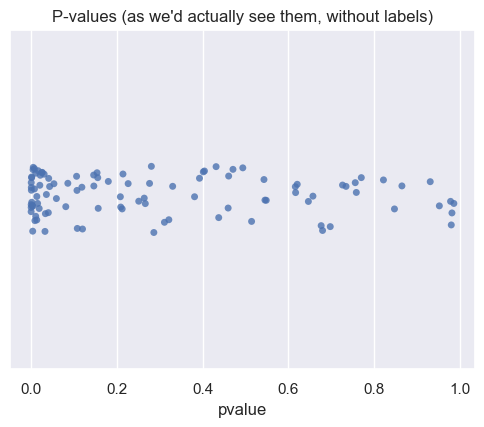

In [46]:
sns.stripplot(
    data=p_values, x='pvalue',
    alpha = 0.8, order = [0, 1], orient = "h",
    #ax=ax
)
plt.title("P-values (as we'd actually see them, without labels)");

Text(0.5, 1.0, 'P-values, with ground truth labels')

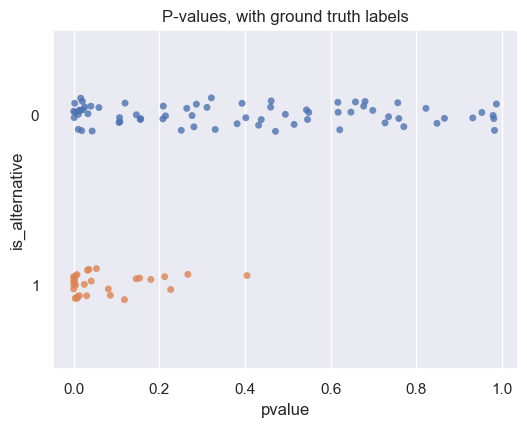

In [47]:
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], orient = "h",
)
plt.title('P-values, with ground truth labels')

<AxesSubplot:xlabel='pvalue'>

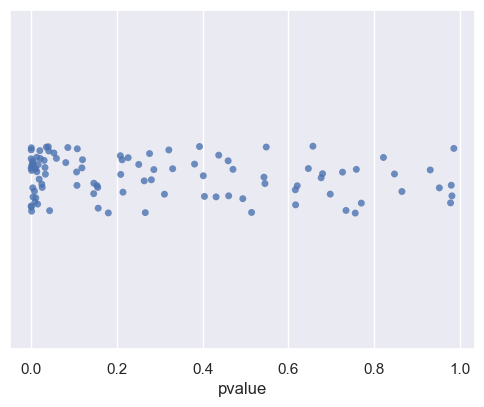

In [48]:
sns.stripplot(
    data=p_values, x='pvalue',
    alpha = 0.8, order = [0, 1], orient = "h",
    #ax=ax
)

In [49]:
p_sorted = p_values.sort_values('pvalue')

In [52]:
N = 100
k = np.arange(1, N+1)
alpha = .05

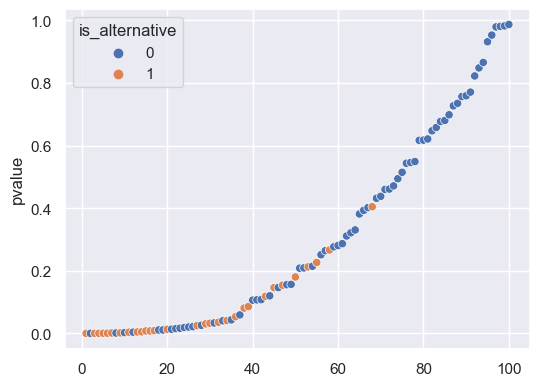

In [53]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);

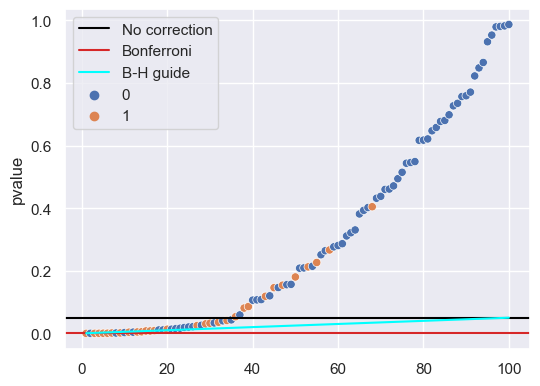

In [54]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / N, label='Bonferroni', color='tab:red')
plt.plot(k, k/N * alpha, label='B-H guide', color='cyan')
plt.legend();

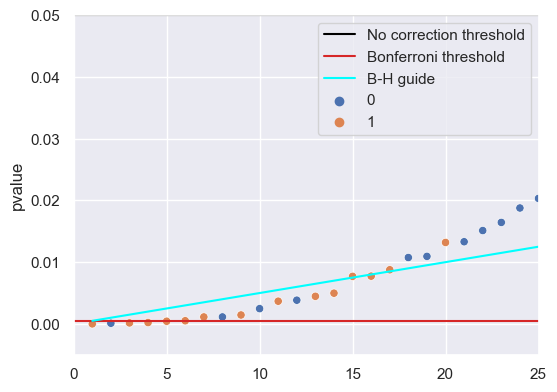

In [55]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative'])
plt.axhline(alpha, label='No correction threshold', color='black')
plt.axhline(alpha / N, label='Bonferroni threshold', color='tab:red')
plt.plot(k, k/N * alpha, label='B-H guide', color='cyan')
plt.legend()

plt.axis([-0.01, 25, -0.005, .05]);